In [1]:
import analyze_mocap
%matplotlib notebook

In [308]:
frames = analyze_mocap.load_qualisys_data("../Experiment data/mocap/Marina0001.tsv")
# Ignore the 'mic' marker
frames = frames.drop(columns="mic")

In [309]:
frames[["leftbow", "scroll"]]

leftbow                      scroll                    
              x        y         z        x         y         z
0      1071.624  186.143  2048.660  956.657  1483.306  1340.800
1      1072.804  185.855  2048.194  956.642  1483.350  1340.900
2      1074.037  185.461  2047.612  956.633  1483.416  1340.977
3      1075.122  184.889  2047.038  956.484  1483.143  1341.100
4      1076.318  184.432  2046.566  956.501  1483.171  1341.172
5      1077.284  183.958  2045.946  956.515  1483.159  1341.241
6      1078.210  183.508  2045.579  956.631  1483.325  1341.669
7      1079.288  182.995  2045.054  956.247  1483.485  1341.618
8      1080.370  182.405  2044.236  956.699  1483.488  1341.793
9      1081.470  181.790  2043.973  956.731  1483.479  1341.820
10     1082.541  181.137  2043.407  956.484  1482.949  1341.349
11     1083.532  180.474  2042.802  956.541  1482.936  1341.320
12     1084.525  179.837  2042.240  956.597  1482.863  1341.338
13     1085.596  179.109  2041.562  956.651  1482.855  1341.353
14     1086.498  178.430  2040.857  956.692  1482.854  1341.351
15     1087.635  177.689  2039.955  956.727  1482.840  1341.402
16     1088.568  177.136  2039.478  956.736  1482.852  1341.455
17     1089.409  176.492  2038.502  956.745  1482.846  1341.491
18     1090.440  175.883  2037.733  956.768  1482.849  1341.558
19     1091.747  175.292  2037.018  956.734  1482.839  1341.641
20     1093.048  174.775  2036.374  956.708  1482.872  1341.701
21     1094.483  174.284  2035.855  956.679  1482.899  1341.808
22     1095.906  173.766  2035.182  956.614  1482.904  1341.895
23     1097.253  173.321  2034.430  956.567  1482.941  1342.063
24     1098.566  172.982  2033.518  956.539  1482.967  1342.231
25     1100.280  172.543  2033.120  956.465  1483.002  1342.393
26     1101.989  172.116  2032.355  956.395  1483.035  1342.547
27     1103.625  171.735  2031.681  956.301  1483.093  1342.723
28     1105.244  171.400  2030.588  956.233  1483.146  1342.889
29     1107.149  171.067  2030.115  957.333  1481.788  1342.612
...         ...      ...       ...      ...       ...       ...
15191   940.939 -269.030  1987.352  728.852  1519.046   755.426
15192   937.799 -263.675  1990.086  726.918  1519.774   755.059
15193   934.634 -258.358  1992.666  725.103  1520.468   754.550
15194   931.178 -252.872  1995.260  723.397  1521.161   754.095
15195   927.629 -247.380  1997.713  721.781  1521.857   753.627
15196   923.842 -241.668  2000.137  720.238  1522.527   753.179
15197   920.168 -236.189  2002.448  718.783  1523.160   752.797
15198   916.398 -230.472  2004.547  717.403  1523.834   752.318
15199   912.632 -224.744  2006.501  716.134  1524.429   751.812
15200   908.925 -218.870  2008.281  714.989  1525.044   751.289
15201   905.420 -213.043  2009.978  713.913  1525.573   750.746
15202   901.860 -207.044  2011.760  712.885  1526.093   750.234
15203   898.498 -200.878  2013.425  711.919  1526.520   749.626
15204   895.135 -194.556  2015.049  711.019  1526.972   749.148
15205   892.027 -188.352  2016.764  710.255  1527.372   748.636
15206   888.890 -182.077  2018.358  709.611  1527.720   748.044
15207   885.922 -175.817  2019.852  709.095  1528.029   747.474
15208   882.912 -169.506  2021.360  708.659  1528.320   746.796
15209   879.912 -163.325  2022.753  708.280  1528.578   746.233
15210   876.864 -157.197  2024.113  708.005  1528.785   745.699
15211   873.769 -151.177  2025.477  707.842  1528.985   745.203
15212   870.466 -145.299  2026.789  707.803  1529.147   744.784
15213   867.104 -139.525  2028.122  707.837  1529.285   744.356
15214   863.475 -133.975  2029.530  707.921  1529.332   743.975
15215   859.562 -128.696  2030.820  708.108  1529.410   743.603
15216   855.364 -123.755  2032.137  708.319  1529.435   743.295
15217   850.839 -119.162  2033.348  708.636  1529.452   743.003
15218   845.974 -114.973  2034.511  709.024  1529.452   742.779
15219   840.748 -111.124  2035.579  709.506  1529.412   742.530
15220   835.323 -107.733  2036.344  710.

<IPython.core.display.Javascript object>


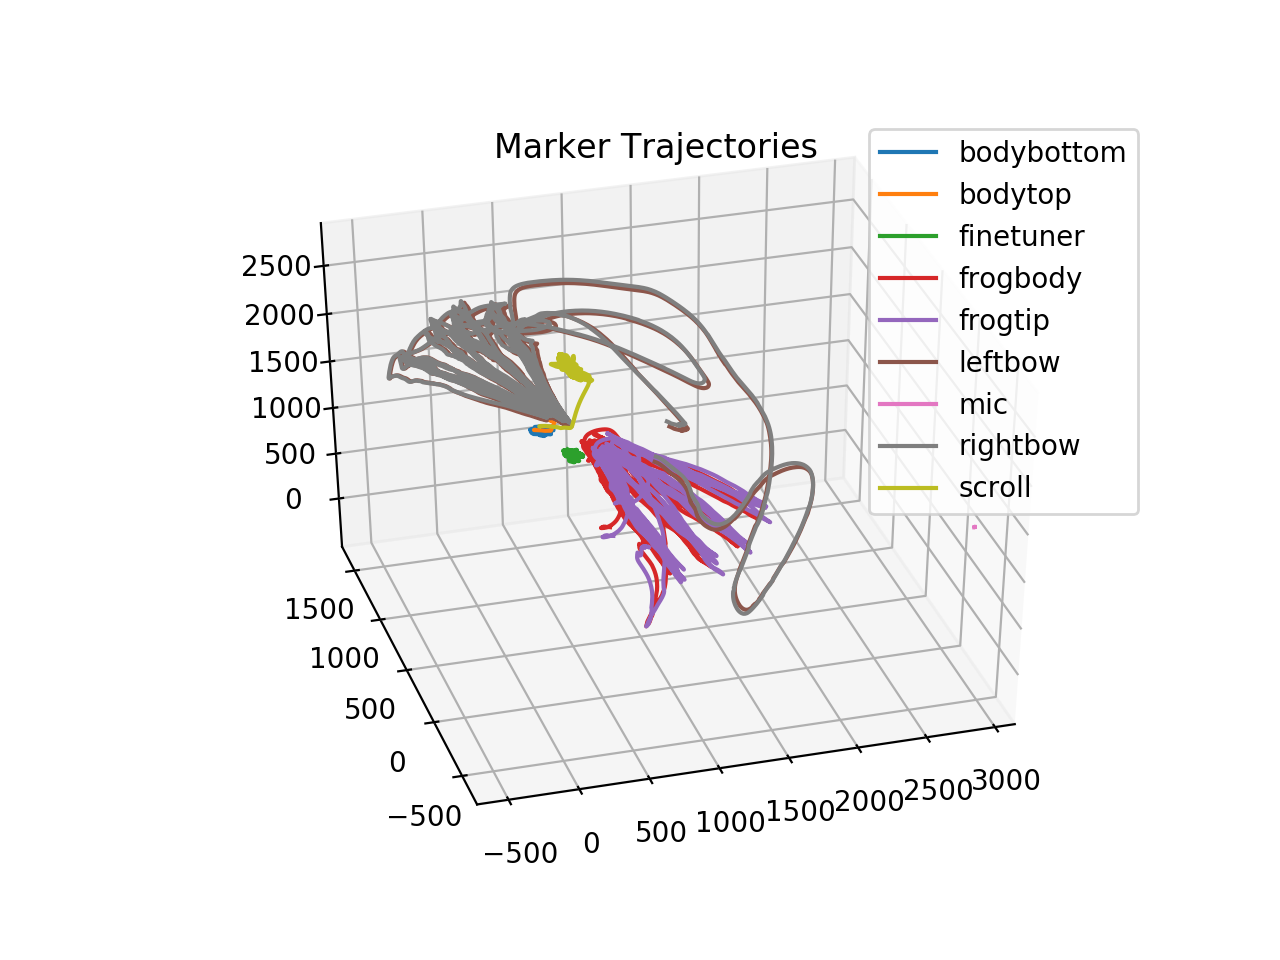

In [121]:
analyze_mocap.plot_marker_trajectories(frames)

In [277]:
viola_markers = ["bodybottom", "bodytop", "scroll"]
viola_markers_virtual = ["Astring", "Dstring", "Gstring", "Cstring", "Abridge", "Dbridge", "Gbridge", "Cbridge"]

In [278]:
from svdt import svdt
import numpy as np
import pandas as pd

def current(orig, rot, pos):
    return pos+np.dot(rot, orig)

def get_current_marker_positions(reference_frame, rotation, translation):
    markers = pd.Series(index=reference_frame.index)
    # Use unique() because the index may include columns that have already been filtered out. (Hack...)
    marker_names = reference_frame.index.unique().levels[0]
    for marker in marker_names:
        markers[marker] = current(reference_frame[marker], rotation, translation)
    return markers

calibration_frames = analyze_mocap.load_qualisys_data("../Experiment data/mocap/Calibration0004.tsv")
reference_frame = calibration_frames.iloc[0]
reference_pos = reference_frame[viola_markers]
reference_pos_virtual = reference_frame[viola_markers_virtual]

test_frame = frames.iloc[10000]
marker_pos = test_frame[viola_markers]
rotation, translation, rmse = svdt(reference_pos, marker_pos)
virtual_markers_current = get_current_marker_positions(reference_pos_virtual, rotation, translation)

In [273]:
rmse

0.28913374936519881

<IPython.core.display.Javascript object>


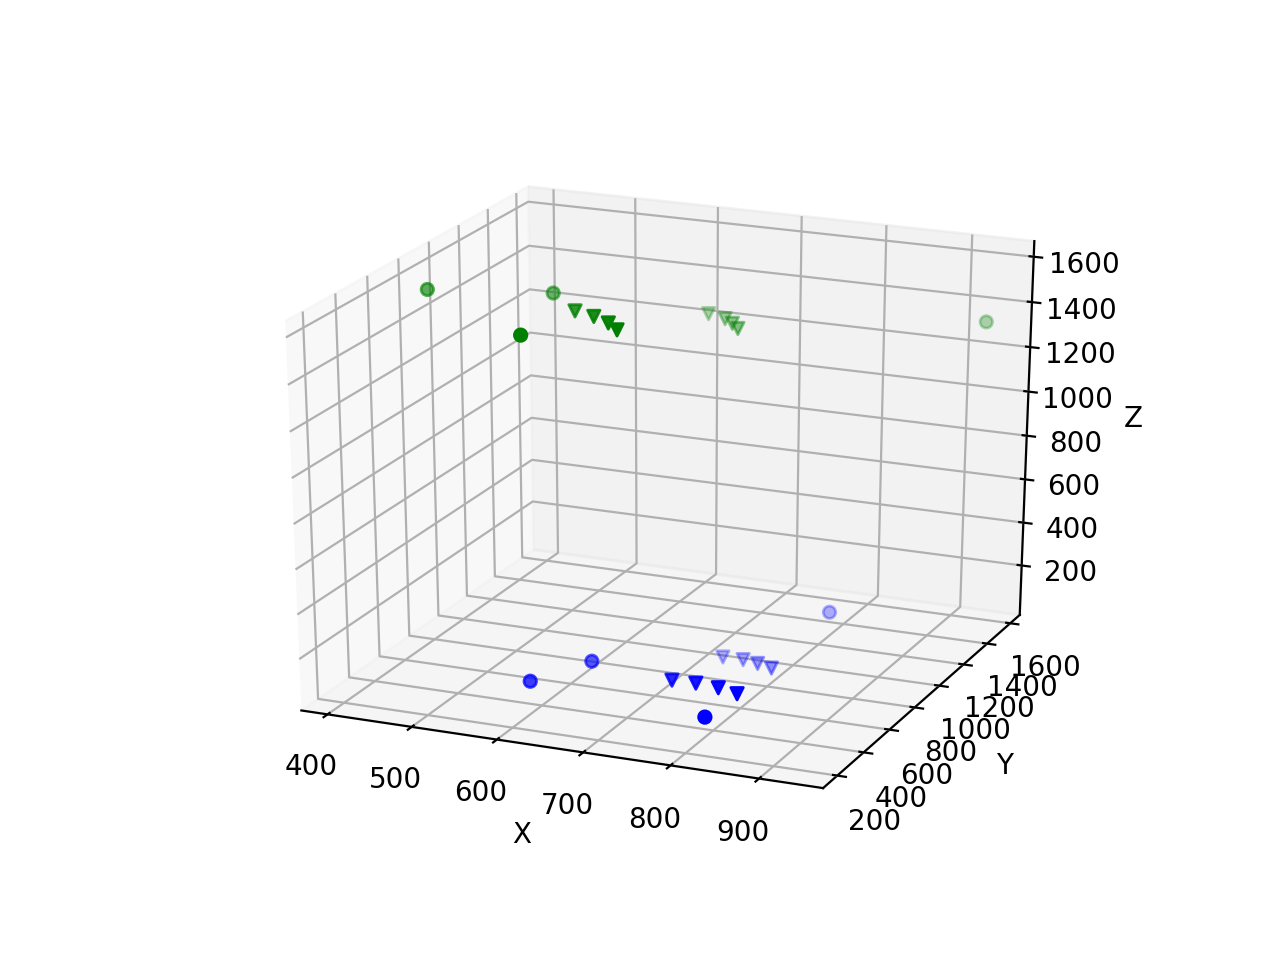

In [279]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def scatter(series, color, marker):
    ax.scatter(series[:, 'x'], series[:, 'y'], series[:, 'z'], c=color, marker=marker)
    
scatter(reference_frame.drop(viola_markers_virtual), 'b', 'o')
scatter(reference_pos_virtual, 'b', 'v')
scatter(test_frame[viola_markers + ['finetuner']], 'g', 'o')
scatter(virtual_markers_current, 'g', 'v')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [281]:
# Add virtual markers to all frames
# Have to make sure both arrays are with the same column ordering, otherwise all the numbers are messed up!!
# For some unexplained reason, these are not equivalent:
#  frames[viola_markers].iloc[0]
#  frames.iloc[0][viola_markers]
#  One of them preserves column ordering and the other does not!
reference_pos_reindexed = reference_pos.reindex(frames[viola_markers].columns)
rotation, translation, rmse = svdt(reference_pos_reindexed, frames[viola_markers])
rmse.mean()

0.23199289337866141

In [316]:
#reference_pos_virtual_reindexed = reference_pos_virtual.reindex(frames[viola_markers].columns)
virtual_markers = pd.DataFrame([
    get_current_marker_positions(reference_pos_virtual, rotation[i], translation[i])
    for i in range(len(frames))
])

# reference frame [r]
#
#  marker1    vmarker1
#  x  y  z    x    y    z
#  x0 y0 z0   vx0  vy0  vz0

# frames [f]
#
#   marker1
#   x  y  z
# 1 x1 y1 z1
# 2 x2 y2 z2

# translation matrix [t]
#
#   x   y   z
# 1 tx1 ty1 tz1
# 2 tx2 ty2 tz2

# rotation matrix [m]
#
# 1 xa1 ya1 za1
#   xb1 yb1 zb1
#   xc1 yc1 zc1
#
# 2 xa2 ya2 za2
#   xb2 yb2 zb2
#   xc2 yc2 zc2


# OUTPUT
#
#   marker1    vmarker1
#   x  y  z    x    
# 1 x1 y1 z1   t[x][1]+np.dot(r[vmarker1][x], 
# 2 x2 y2 z2


<IPython.core.display.Javascript object>


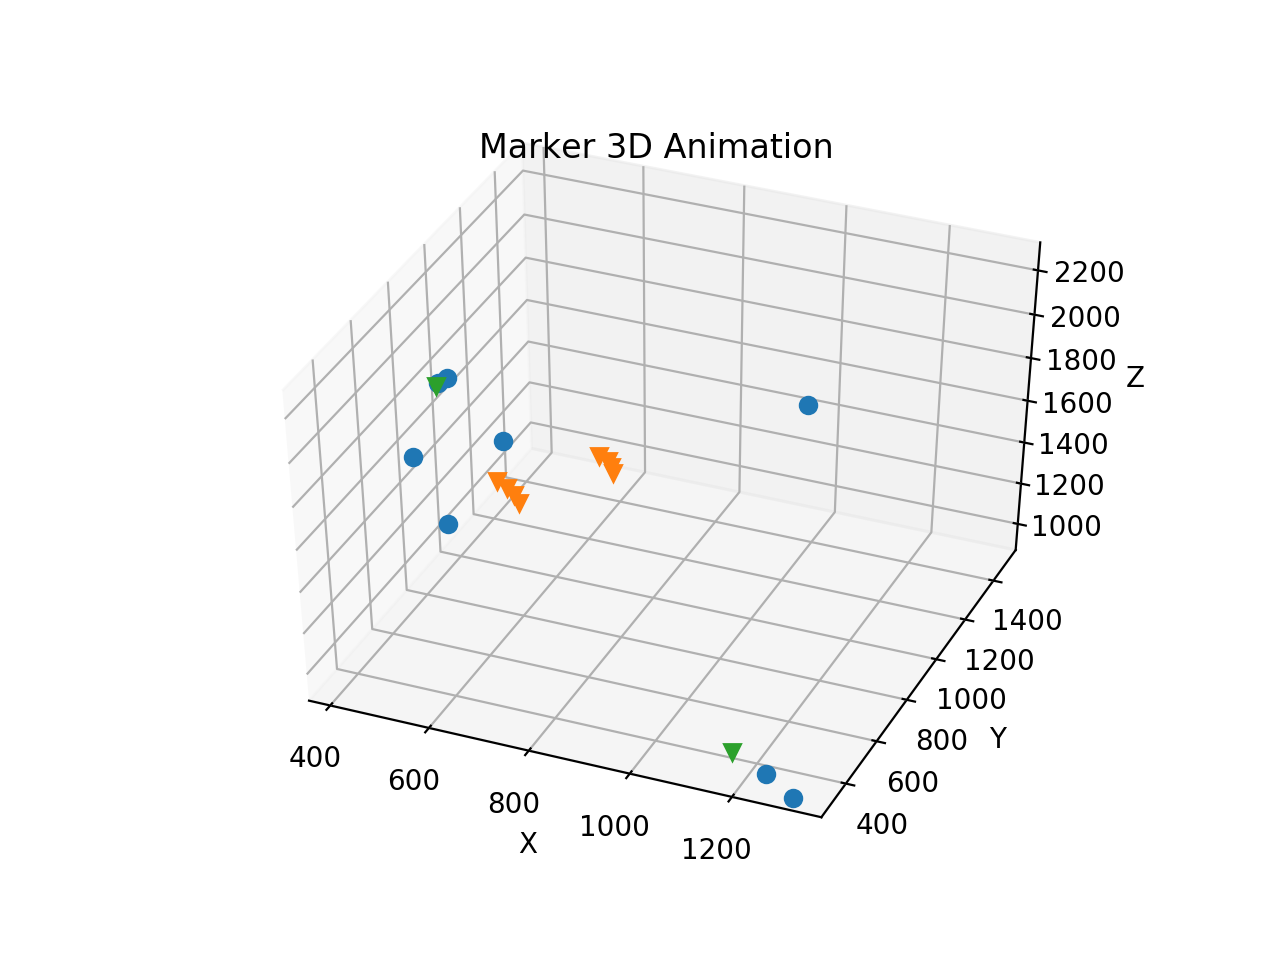

In [431]:
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

frames_to_play = range(1000,12000,10)
first_frame = frames.iloc[frames_to_play[0]]
plot = ax.plot(first_frame[:,'x'], first_frame[:, 'y'], first_frame[:, 'z'], linestyle="", marker="o")[0]

first_frame2 = virtual_markers.iloc[frames_to_play[0]]
plot2 = ax.plot(first_frame2[:,'x'], first_frame2[:, 'y'], first_frame2[:, 'z'], linestyle="", marker="v")[0]

first_frame3 = virtual_markers_bow.iloc[frames_to_play[0]]
plot3 = ax.plot(first_frame3[:,'x'], first_frame3[:, 'y'], first_frame3[:, 'z'], linestyle="", marker="v")[0]

def update_plot(num):
    markers = frames.iloc[num]
    plot.set_data(markers[:, 'x'], markers[:, 'y'])
    plot.set_3d_properties(markers[:, 'z'])

    markers2 = virtual_markers.iloc[num]
    plot2.set_data(markers2[:, 'x'], markers2[:, 'y'])
    plot2.set_3d_properties(markers2[:, 'z'])

    markers3 = virtual_markers_bow.iloc[num]
    plot3.set_data(markers3[:, 'x'], markers3[:, 'y'])
    plot3.set_3d_properties(markers3[:, 'z'])

    return plot, plot2, plot3

# Attaching 3D axis to the figure
# ax2.set_xlim3d([-1500, 1500])
ax.set_xlabel('X')
# ax2.set_ylim3d([500, 1500])
ax.set_ylabel('Y')
# ax2.set_zlim3d([800, 1800])
ax.set_zlabel('Z')
ax.set_title('Marker 3D Animation')

animation = animation.FuncAnimation(fig, update_plot, frames_to_play, interval=50, blit=False)
plt.show()


In [331]:
bow_markers = ["frogtip", "frogbody", "rightbow"]
bow_markers_virtual = ["frog_hair", "tip_hair"]

calibration_frames_bow = analyze_mocap.load_qualisys_data("../Experiment data/mocap/Calibration_bow hair0005.tsv")
reference_frame_bow = calibration_frames_bow.iloc[0]
reference_pos_bow = reference_frame_bow[bow_markers]
reference_pos_bow_virtual = reference_frame_bow[bow_markers_virtual]

test_frame = frames.iloc[10000]
marker_pos_bow = test_frame[bow_markers].reindex(reference_pos_bow.index)
rotation, translation, rmse = svdt(reference_pos_bow, marker_pos_bow)
virtual_markers_current_bow = get_current_marker_positions(reference_pos_bow_virtual, rotation, translation)
rmse

0.37269482426955219

<IPython.core.display.Javascript object>


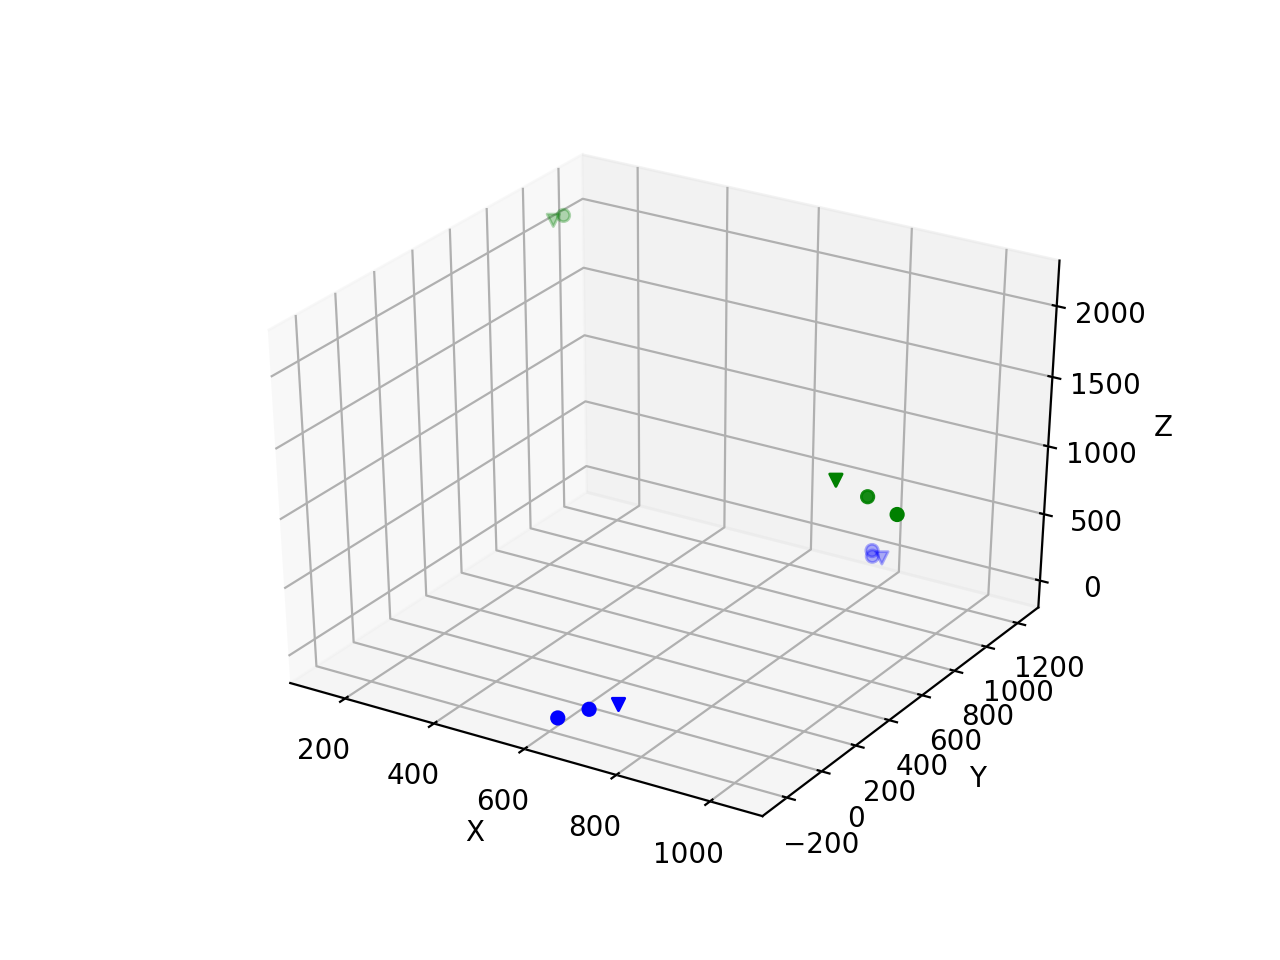

In [333]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def scatter(series, color, marker):
    ax.scatter(series[:, 'x'], series[:, 'y'], series[:, 'z'], c=color, marker=marker)
    
scatter(reference_frame_bow.drop(bow_markers_virtual), 'b', 'o')
scatter(reference_pos_bow_virtual, 'b', 'v')
scatter(test_frame[bow_markers], 'g', 'o')
scatter(virtual_markers_current_bow, 'g', 'v')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [335]:
reference_pos_bow_reindexed = reference_pos_bow.reindex(frames[bow_markers].columns)
rotation, translation, rmse = svdt(reference_pos_bow_reindexed, frames[bow_markers])
rmse.mean()

0.56674656302041515

In [339]:
virtual_markers_bow = pd.DataFrame([
    get_current_marker_positions(reference_pos_bow_virtual, rotation[i], translation[i])
    for i in range(len(frames))
])


In [340]:
virtual_markers_bow.iloc[100]

frog_hair  x     749.615306
           y     466.882720
           z     802.715634
tip_hair   x    1113.324587
           y     205.718439
           z    2009.039054
Name: 100, dtype: float64

In [352]:
def unit_vector(vector):
    """ Returns the unit vector of the vector. """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2' """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def get_skewness(frame):
    bow = virtual_markers_bow.iloc[frame]
    bow_vec = bow['tip_hair'] - bow['frog_hair']
    string = get_string_for_frame(frame)
    viola = virtual_markers.iloc[frame]
    string_vec = viola[string + 'bridge'] - viola[string + 'string']
    skewness_radians = np.pi / 2 - angle_between(string_vec, bow_vec)
    skewness_degrees = skewness_radians / np.pi * 180
    return skewness_degrees

def get_string_for_frame(frame):
    if frame < 5074:
        return 'C'
    elif frame < 8260:
        return 'G'
    elif frame < 11478:
        return 'D'
    else:
        return 'A'

In [357]:
skewness = pd.Series(get_skewness(i) for i in range(len(frames)))

In [360]:
bow_changes_raw = [
    [1860, 2276, 2673, 3083, 3463, 3870, 4256, 4675],
    [5074, 5475, 5865, 6273, 6657, 7073, 7467, 7877],
    [8260, 8663, 9061, 9469, 9861, 10270, 10665, 11071],
    [11478, 11864, 12256, 12671, 13067, 13477, 13867, 14275]
]
bow_changes = pd.DataFrame(bow_changes_raw, index=['C', 'G', 'D', 'A'])

In [373]:
bow_changes.loc['C',0]

1860

<IPython.core.display.Javascript object>


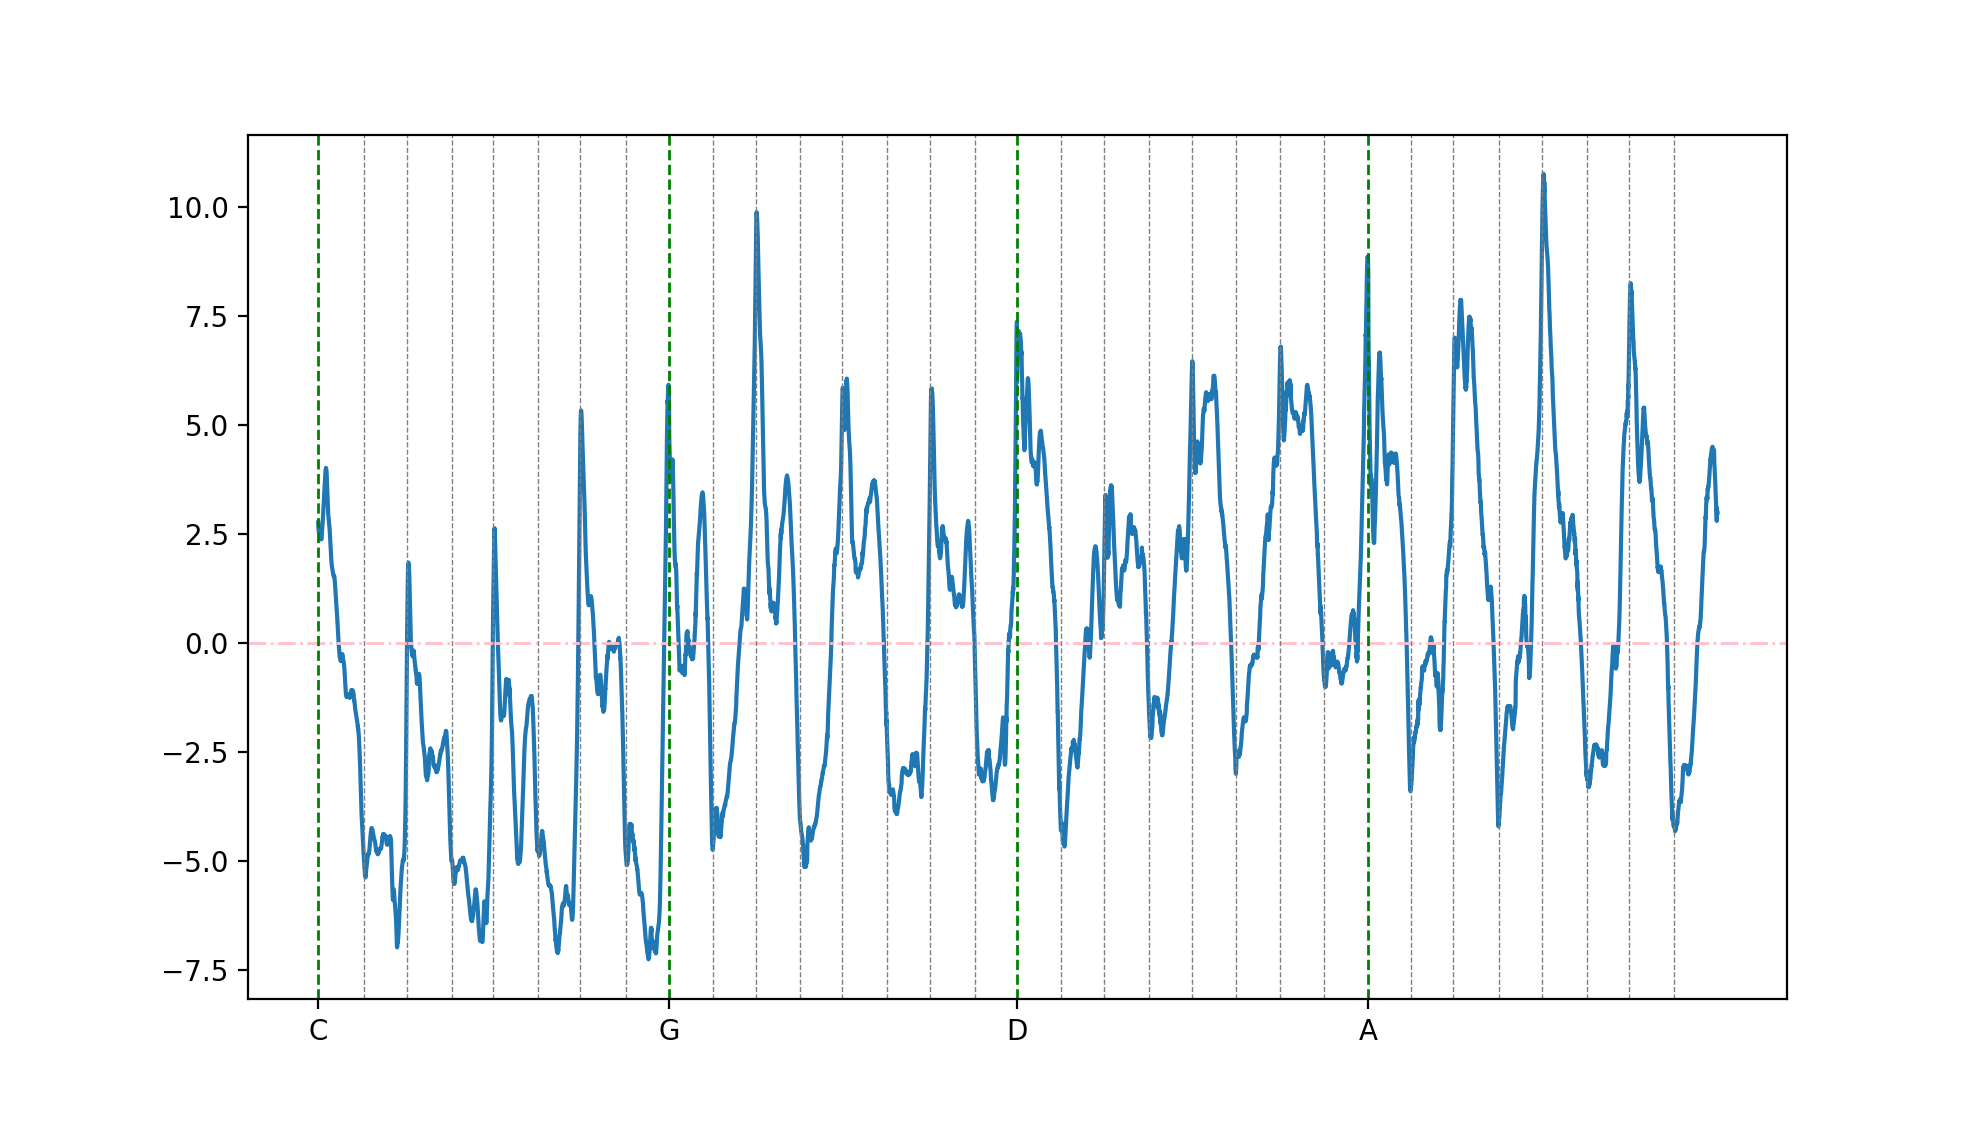

In [399]:
frame_range = range(1860, 14675)

fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.plot(skewness.iloc[1860:14676])

ax.axhline(0, linewidth=1, linestyle='-.', color='pink')

# Add vertical line for every bow change.
for string, changes in bow_changes.iterrows():
    ax.axvline(changes[0], label='asfasf', linewidth=1, linestyle='--', color='green')
    for change in range(1,8):
        ax.axvline(changes[change], linewidth=0.5, linestyle='--', color='gray')

ticks = plt.xticks(bow_changes.loc[:, 0], bow_changes.index)


In [405]:
def get_velocity(frame):
    if frame == 0:
        return np.nan
    
    bow = virtual_markers_bow.iloc[frame]
    bow_prev = virtual_markers_bow.iloc[frame-1]
    bow_vec = unit_vector(bow['tip_hair'] - bow['frog_hair'])
    
    string = get_string_for_frame(frame)
    string_prev = get_string_for_frame(frame-1)
    string_bridge = virtual_markers.iloc[frame][string + 'bridge']
    #string_bridge_prev = virtual_markers.iloc[frame-1][string_prev + 'bridge']
    difference = (bow['tip_hair'] - string_bridge) - (bow_prev['tip_hair'] - string_bridge)
    velocity = np.dot(difference, bow_vec)
    return velocity

In [406]:
velocity = pd.Series(get_velocity(i) for i in range(len(frames)))

In [402]:
velocity[1000]

0.98308704650775125

<IPython.core.display.Javascript object>


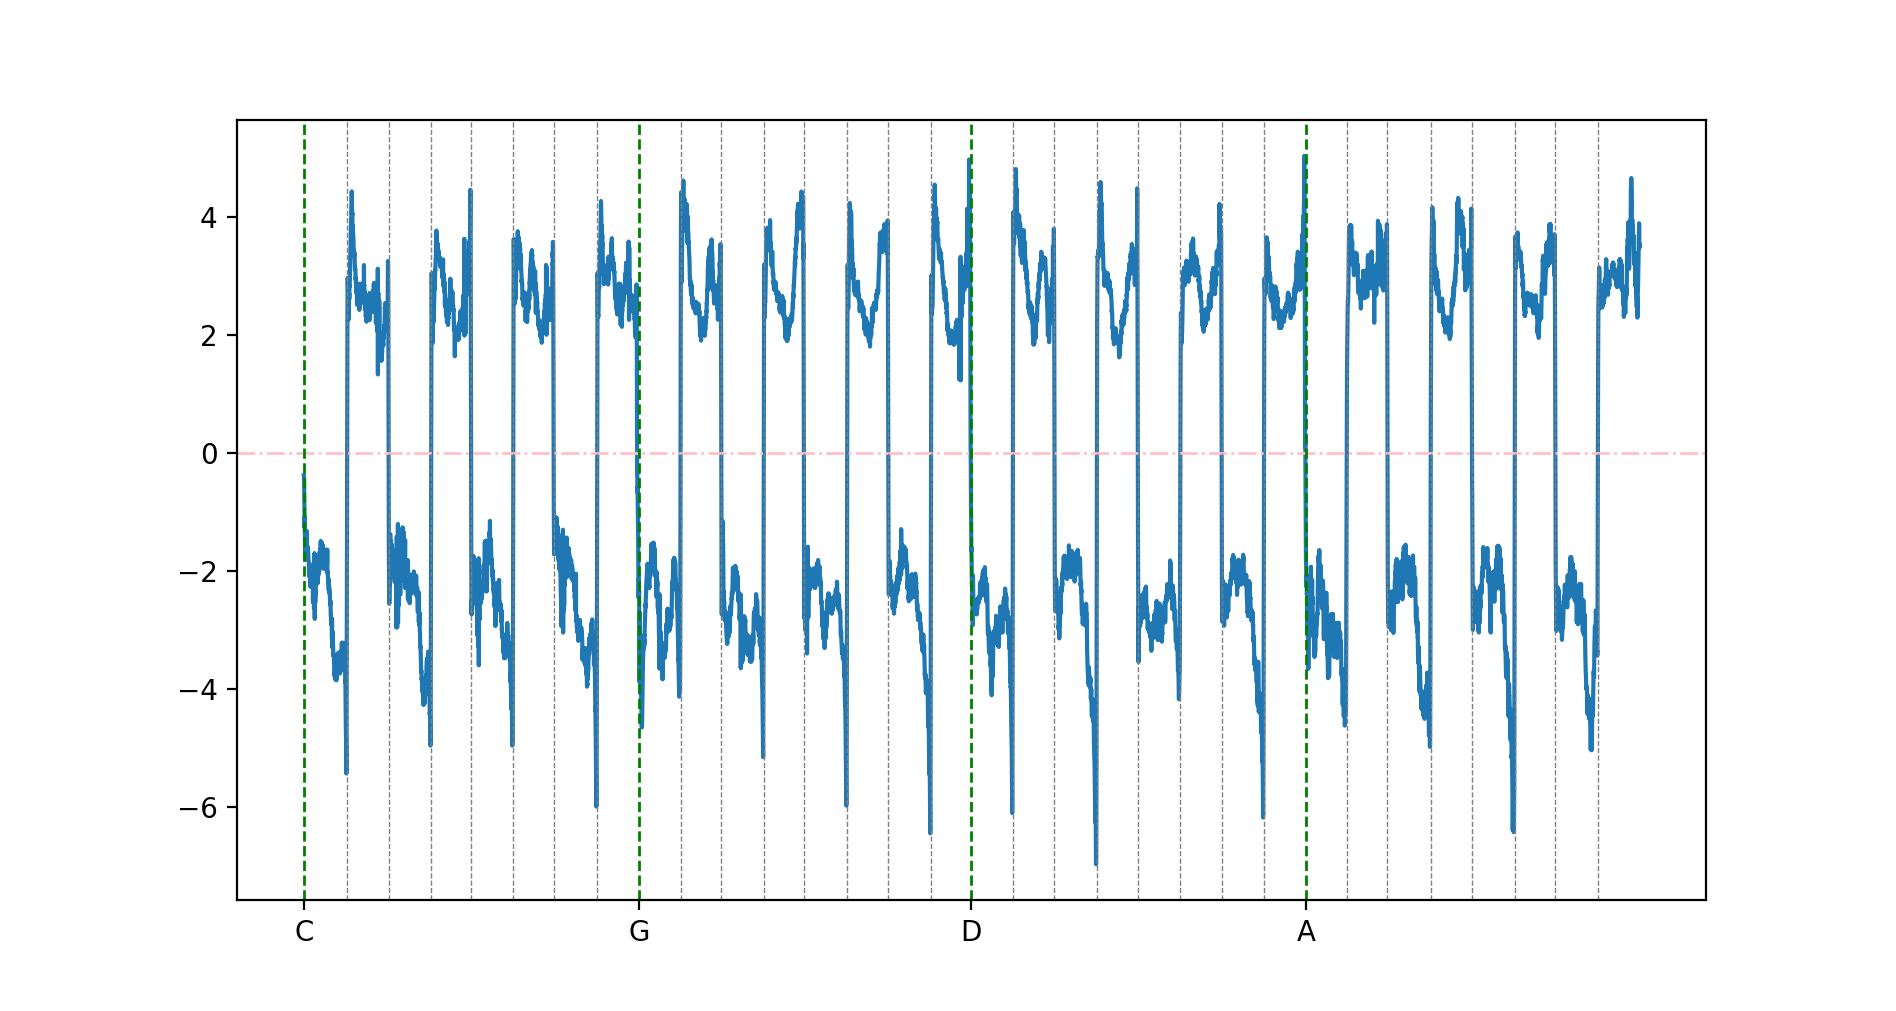

In [407]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.plot(velocity.iloc[1860:14676])

ax.axhline(0, linewidth=1, linestyle='-.', color='pink')

# Add vertical line for every bow change.
for string, changes in bow_changes.iterrows():
    ax.axvline(changes[0], linewidth=1, linestyle='--', color='green')
    for change in range(1,8):
        ax.axvline(changes[change], linewidth=0.5, linestyle='--', color='gray')

ticks = plt.xticks(bow_changes.loc[:, 0], bow_changes.index)


In [408]:
velocity.to_csv("velocity.csv")

In [410]:
skewness.to_csv("skewness.csv")

In [454]:
reload(analyze_mocap)
#analyze_mocap.get_string_for_frame("Matan", 3, 9400)

(0        16.516315
 1        16.523398
 2        16.467024
 3        16.504157
 4        16.507163
 5        16.487768
 6        16.491035
 7        16.420296
 8        16.367904
 9        16.367744
 10       16.589939
 11       16.559228
 12       16.588315
 13       16.590762
 14       16.583240
 15       16.576998
 16       16.583121
 17       16.606570
 18       16.575621
 19       16.561517
 20       16.554240
 21       16.538574
 22       16.527337
 23       16.484136
 24       16.488612
 25       16.453489
 26       16.427632
 27       16.402114
 28       16.357880
 29       16.563154
            ...    
 15191    62.284400
 15192    62.137950
 15193    61.971193
 15194    61.776215
 15195    61.612928
 15196    61.489787
 15197    61.269696
 15198    61.078127
 15199    60.894653
 15200    60.722248
 15201    60.528291
 15202    60.318552
 15203    60.139950
 15204    59.879323
 15205    59.703549
 15206    59.526642
 15207    59.294190
 15208    59.054812
 15209    58.856748


In [455]:
skewness, velocity = _

In [459]:
skewness[2000]

1.5440477405010824

In [468]:
from collections import defaultdict
data = defaultdict(dict)

for participant in analyze_mocap.participants:
    for trial in analyze_mocap.trials:
        data[participant][trial] = analyze_mocap.extract_bow_parameters(participant, trial)

In [469]:
for participant in analyze_mocap.participants:
    for trial in analyze_mocap.trials:
        skewness, velocity = data[participant][trial]
        skewness.to_csv("skewness_%s_%s.csv" % (participant, trial))
        velocity.to_csv("velocity_%s_%s.csv" % (participant, trial))

In [561]:
def plot_series(data, participant, trial, data_type):
    data_index = 0 if data_type == "skewness" else 1
    series = data[participant][trial][data_index]
    changes = analyze_mocap.bow_changes[participant][trial]
    first_frame = int(changes.iloc[0, 0])
    last_frame = int(changes.iloc[-1, -1])
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)
    plot = ax.plot(series.iloc[first_frame:last_frame])
    # Add horizontal line on zero.
    ax.axhline(0, linewidth=1, linestyle='-.', color='pink')
    # Add vertical line for every bow change.
    for string, string_changes in changes.iteritems():
        ax.axvline(string_changes.iloc[0], linewidth=1, linestyle='--', color='green')
        for change in range(1,8):
            ax.axvline(string_changes.iloc[change], linewidth=0.5, linestyle='--', color='gray')
    ax.axvline(last_frame, linewidth=1, linestyle='--', color='green')
    ticks = plt.xticks(changes.iloc[0, :], changes.columns)
    plt.title("%s #%s - %s" % (participant, trial, data_type))    
    ylim = {"velocity": (-7, 7), "skewness": (-30, 30)}
    ax.set_ylim(*ylim[data_type])
 #   plt.savefig()
#    plt.close()

<IPython.core.display.Javascript object>


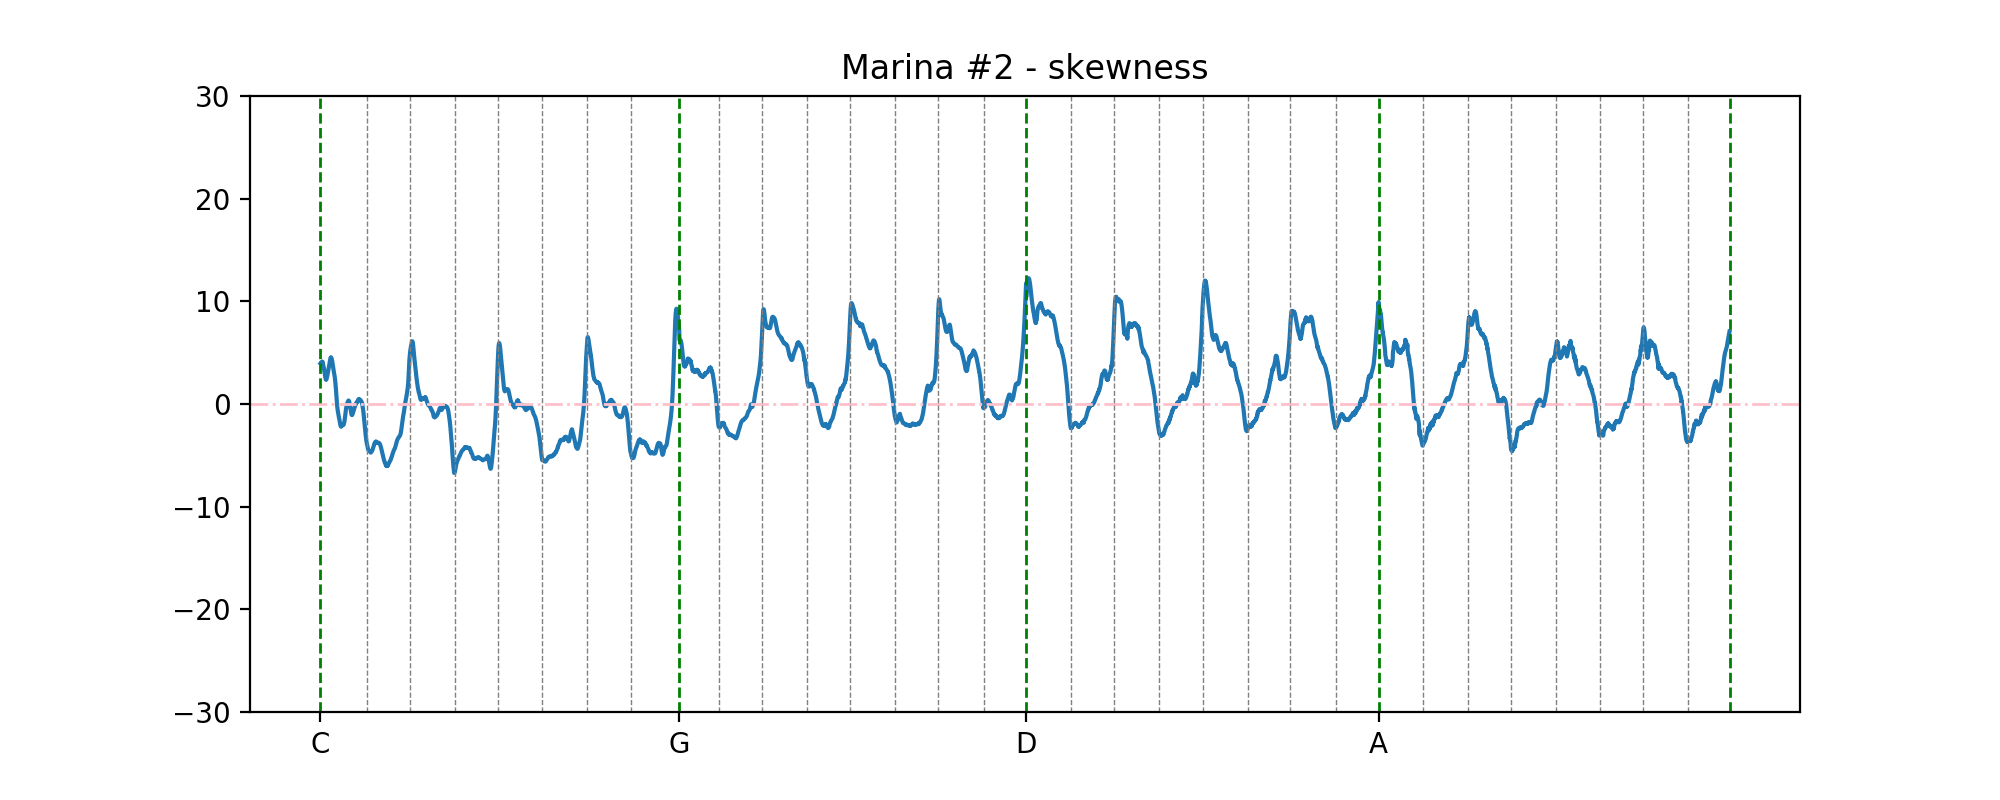

In [559]:
plot_series(data, "Marina", 2, "skewness")

In [476]:
analyze_mocap.bow_changes["Matan"][1]

,C,G,D,A
Stroke,,,,
1,455.0,3680.0,6866.0,10069
2,860.0,4063.0,7266.0,10466
3,1254.0,4465.0,7653.0,10854
4,1646.0,4863.0,8062.0,11254
5,2061.0,5247.0,8447.0,11638
6,2453.0,5650.0,8858.0,12069
7,2860.0,6043.0,9263.0,12449
8,3255.0,6467.0,9658.0,12851
9,NaN,NaN,NaN,13238


In [538]:
def get_frame_range(participant, trial):
    changes = analyze_mocap.bow_changes[participant][trial]
    first_frame = int(changes.iloc[0, 0])
    last_frame = int(changes.iloc[-1, -1])
    return slice(first_frame, last_frame)

for data_type in range(2):
    print "="*10
    print "skewness" if data_type == 0 else "velocity"
    print "%7s %7s %5s %5s" % ("Participant", "Trial", "Min", "Max")
    for participant in analyze_mocap.participants:
        for trial in analyze_mocap.trials:
            series = data[participant][trial][data_type][get_frame_range(participant, trial)]
            print "%7s %7s %7.2f %7.2f" % (participant, trial, series.min(), series.max())

skewness
Participant   Trial   Min   Max
 Marina       1   -7.25   10.76
 Marina       2   -6.72   12.25
 Marina       3   -7.93   10.93
  Matan       1  -23.53    8.73
  Matan       2  -25.58    6.26
  Matan       3  -27.95    3.74
velocity
Participant   Trial   Min   Max
 Marina       1   -6.97    5.03
 Marina       2   -6.41    4.64
 Marina       3   -6.22    5.26
  Matan       1   -6.06    5.89
  Matan       2   -5.60    4.68
  Matan       3   -4.98    4.67


In [ ]:
for data_type in ("velocity", "skewness"):
    for participant in analyze_mocap.participants:
        for trial in analyze_mocap.trials:
            plot_series(data, participant, trial, data_type)
            filename = "%s_%s_%s" % (participant, trial, data_type)
            plt.savefig(filename + ".pdf")
            plt.close()
